In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from datetime import datetime

In [8]:
subs = pd.read_csv("submissions-30day.csv", names=['lb', 'ub', 'count'])
pays = pd.read_csv("payloads-30days.csv", names=['lb', 'ub', 'count'])

In [9]:
pays['count'] / subs['count']

0     0.551637
1     0.572161
2     0.497734
3     0.485609
4     0.532971
5     0.527047
6     0.509390
7     0.524784
8     0.488226
9     0.518968
10    0.492243
11    0.488904
12    0.460437
13    0.453014
14    0.417476
15    0.387261
16    0.553830
17    0.597744
18    0.595445
19    0.551282
20    0.581055
21    0.578000
22    0.562019
23    0.552063
24    0.572991
25    0.579125
26    0.538062
27    0.548046
28    0.518839
29    0.487490
Name: count, dtype: float64

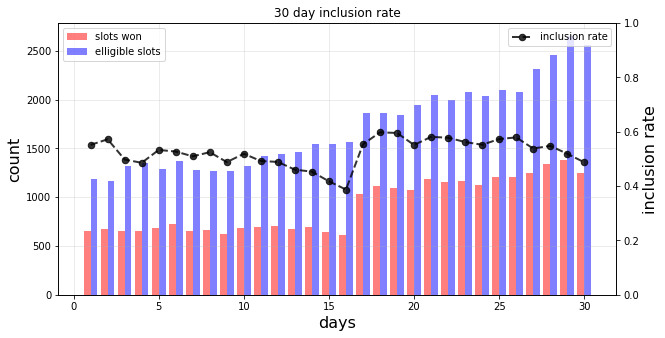

In [104]:
f, ax = plt.subplots(figsize=(10,5))

x=np.arange(1, 31)
ax.bar(x-0.2, pays['count'].values, width=0.4, color='r', alpha=0.5, label='slots won')
ax.bar(x+0.2, subs['count'].values, width=0.4, color='b', alpha=0.5, label='elligible slots')

ax.set_xlabel('days', size=16)
ax.set_ylabel('count', size=16)
ax.grid(alpha=0.3)

ax2 = ax.twinx()
ax2.plot(x, pays['count'].values / subs['count'].values, 'k.--', linewidth=2, alpha=0.8, label='inclusion rate', markersize=13)
ax2.set_ylim(0, 1)
ax2.set_ylabel('inclusion rate', size=16)
ax.set_title('30 day inclusion rate')
ax.legend()
ax2.legend()
plt.show()

In [57]:
s1000 = pd.read_csv('alchemy-data/sample1000.csv', delimiter=' ', names=['block', 'hash', 'submissions', 'winning'])
s1000.head()

,block,hash,submissions,winning
0,16484026,0x8131b1ca0f3bc71f05bacb947070916206e1c48e6c8c...,864,1
1,16484030,0xcd14c3359ee6b134b181d1f4a716b6bbe1d01a4542e6...,638,1
2,16484032,0x65ce84a69ee074fbbafb24ec2be099bf8c169f94a53e...,803,1
3,16484040,0x7ee315659184fbc6c36b3f526fae94dc366a911bcaf3...,563,0
4,16484041,0x4697009bbb744aa5d11431c27f8049328b80732a4112...,717,1


In [63]:
s1000['winning'].value_counts()

1    119
0     27
2      3
3      1
Name: winning, dtype: int64

In [65]:
27/150, 123/150

(0.18, 0.82)

In [85]:
bbs = pd.read_csv('blocknumbounds.txt', names=['lb', 'ub'])
bbs.head()

,lb,ub
0,16484026,16491182
1,16491182,16498342
2,16498342,16505506
3,16505506,16512669
4,16512669,16519833


In [94]:
lbs = bbs['lb'].values
ubs = bbs['ub'].values

In [95]:
def findDay(bl):
    for i in range(len(bbs)):
        if bl >= lbs[i] and bl < ubs[i]:
            return i
    return -1

In [109]:
findDay(16698333)

29

In [108]:
w20 = pd.read_csv('alchemy-data/winningflow20.txt', delimiter=' ', names=['block', 'hash', 'winning'])
w20.head()

,block,hash,winning
0,16484026,0x8131b1ca0f3bc71f05bacb947070916206e1c48e6c8c...,1
1,16484175,0xb35a4d6305cf54c1e7fe00664c5a111bcc5192f39ed6...,0
2,16484283,0x8d85d07892254c15b25e3a73745d698597cc637ce88c...,1
3,16484414,0xc9948f56aad21dcc17eaf2fb773fe36029a0c149d75b...,1
4,16484571,0x297fe9daa304a2d8b5860440c28607557aa848ff743c...,1


In [111]:
w20_30day = np.zeros(30)
c20_30day = np.zeros(30)
for ind, row in w20.iterrows():
    day = findDay(row['block'])
#     print(ind, day)
    c20_30day[day] += 1
    if row['winning'] > 0:
        w20_30day[day] += 1

In [114]:
w20_30day/c20_30day, w20_30day, c20_30day

(array([0.75      , 0.91525424, 0.72727273, 0.74626866, 0.81538462,
        0.88235294, 0.84375   , 0.8125    , 0.80952381, 0.87878788,
        0.73239437, 0.86111111, 0.87671233, 0.79220779, 0.87179487,
        0.84615385, 0.79787234, 0.76344086, 0.82608696, 0.82474227,
        0.84466019, 0.78      , 0.85576923, 0.75247525, 0.78301887,
        0.84466019, 0.68103448, 0.79674797, 0.78787879, 0.7890625 ]),
 array([ 45.,  54.,  48.,  50.,  53.,  60.,  54.,  52.,  51.,  58.,  52.,
         62.,  64.,  61.,  68.,  66.,  75.,  71.,  76.,  80.,  87.,  78.,
         89.,  76.,  83.,  87.,  79.,  98., 104., 101.]),
 array([ 60.,  59.,  66.,  67.,  65.,  68.,  64.,  64.,  63.,  66.,  71.,
         72.,  73.,  77.,  78.,  78.,  94.,  93.,  92.,  97., 103., 100.,
        104., 101., 106., 103., 116., 123., 132., 128.]))

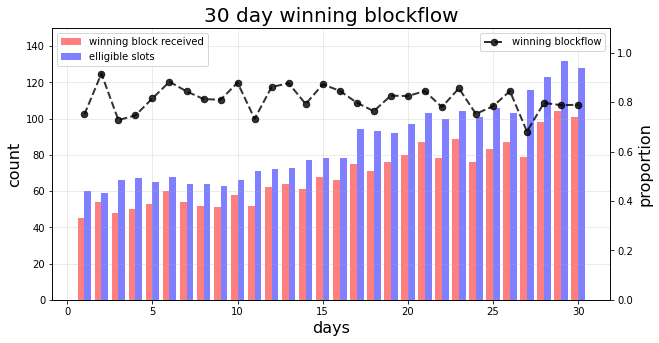

In [122]:
f, ax = plt.subplots(figsize=(10,5))

x=np.arange(1, 31)
ax.bar(x-0.2, w20_30day, width=0.4, color='r', alpha=0.5, label='winning block received')
ax.bar(x+0.2, c20_30day, width=0.4, color='b', alpha=0.5, label='elligible slots')

ax.set_xlabel('days', size=16)
ax.set_ylabel('count', size=16)
ax.grid(alpha=0.3)

ax2 = ax.twinx()
ax2.plot(x, w20_30day/c20_30day, 'k.--', linewidth=2, alpha=0.8, label='winning blockflow', markersize=13)
ax2.set_ylim(0, 1.1)
ax.set_ylim(0, 150)
ax2.set_ylabel('proportion', size=16)
ax.set_title('30 day winning blockflow', size=20)
ax.legend(loc=2)
ax2.legend()
plt.show()

In [ ]:
16656941 0x9d9adc1c72b5c409364e44097ea4d7959bd158a7d99cf8a0b905f1b4689cbda3 0

In [ ]:
16690971 0x49d7b97e65da66fb978089208a6f8d2ed5826f48c3ff7287d4cc7547ff1df44a 0

In [69]:
group = pd.read_csv('grouped.txt')
group.head()

,slot,block_number
0,5652333,16484026
1,5652337,16484030
2,5652339,16484032
3,5652347,16484040
4,5652348,16484041


In [70]:
len(group)

51657

In [2]:
feb26 = pd.read_csv('alchemy-data/feb26.txt')
feb26.head()

,slot,block_number
0,5877703,16707626
1,5877704,16707627
2,5877707,16707630
3,5877710,16707633
4,5877720,16707643


In [3]:
len(feb26)

2548

In [77]:
group['block_number'][::20].to_csv('grouped20.csv', index=False)

In [78]:
g20 = group['block_number'][::20].values

In [80]:
len(g20)

2583

In [6]:
feb26['block_number'].values[879]

16710099

In [ ]:
16710099

In [9]:
payload = '['
# for i in g20[2000:]:
for i in feb26['block_number'].values[2100:]:
    template = '"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0x{:02x}",false],"id":0'.format(i)
    payload += "{"
    payload += template
    payload += "},"
payload=payload[:-1]
payload += "]"
payload

'[{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xff070f",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xff0713",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xff0715",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xff0717",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xff0718",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xff071c",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xff071d",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xff0721",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xff0723",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xff0726",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xff0728",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xf

In [32]:
bounds = [16484026,16491182,16498342,16505506,16512669,16519833,16526998,16534158,16541307,16548446,16555610,16562775,16569938,16577092,16584251,16591387,16598551,16605709,16612873,16620030,16627179,16634332,16641482,16648623,16655708,16662828,16669948,16677068,16684174,16691287,16698382]

In [ ]:
curl https://eth-mainnet.g.alchemy.com/v2/cnHeH_ifD-29lrdBoGTMISiDgmrF9ZBz -X POST -H
    "Content-Type: application/json" -s -d '[{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86ba",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86bb",false],"id":0}]' 
    | jq -jr '.[] | .result["number"], " ", .result["hash"], "\n"' > feb263.txt

In [36]:
import requests

In [37]:
url = 'https://eth-mainnet.g.alchemy.com/v2/cnHeH_ifD-29lrdBoGTMISiDgmrF9ZB'
payload = '[{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86ba",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86bb",false],"id":0}]'
headers = {'content-type': 'application/json'}
r = requests.post(url, data=payload, headers=headers)

In [40]:
16698026-16484026

214000

16484026

In [51]:
template = '"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0x{:02x}",false],"id":0'.format(i)
template

'"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86ba",false],"id":0'

In [55]:
payload = '['
for i in range(16484026,16484026+1000):
    template = '"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0x{:02x}",false],"id":0'.format(i)
    payload += "{"
    payload += template
    payload += "},"
payload=payload[:-1]
payload += "]"
payload

'[{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86ba",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86bb",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86bc",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86bd",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86be",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86bf",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86c0",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86c1",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86c2",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86c3",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86c4",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xf

In [39]:
print(r)

<Response [401]>


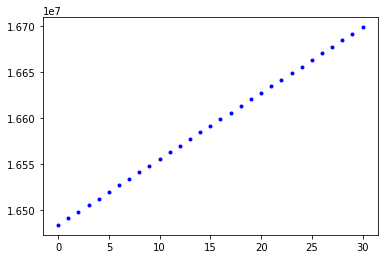

In [35]:
plt.plot(bounds, 'b.')